## Useful info
Source: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset <br>Dataset info: three sentiments namely, negative(-1), neutral(0), and positive(+1). It contains two fields for the tweet and label.

## Importing Libraries separated into 4 cells for each basic import, matplotlib, nltk, & sklearn

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer

import re
import string
from string import punctuation

In [4]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Reading the CSV file

In [5]:
data = pd.read_csv('Twitter_Data.csv')
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Renaming the column

In [6]:
data.rename(columns = {'clean_text':'text'}, inplace = True)
data.head()

,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Removing null values

In [7]:
print('Before removing null\nDataset size:',data.shape,'\n',data.isnull().sum())
data=data.dropna()
print('--------------------------------------------')
print('After removing null\nDataset size:',data.shape,'\n',data.isnull().sum())

Before removing null
Dataset size: (162980, 2) 
 text        4
category    7
dtype: int64
--------------------------------------------
After removing null
Dataset size: (162969, 2) 
 text        0
category    0
dtype: int64


## Removing duplicate value

In [8]:
print('Before dropping duplicate values', data.shape)
print('--------------------------------------------')
data=data.drop_duplicates()
print('After dropping duplicate values', data.shape)

Before dropping duplicate values (162969, 2)
--------------------------------------------
After dropping duplicate values (162969, 2)


## EDA for category in the dataset

In [9]:
data.groupby('category').describe()

text                                                               
          count unique                                                top freq
category                                                                      
-1.0      35509  35509  when modi promised “minimum government maximum...    1
 0.0      55211  55211  talk all the nonsense and continue all the dra...    1
 1.0      72249  72249  what did just say vote for modi  welcome bjp t...    1

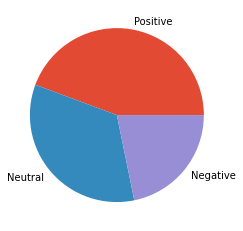

In [10]:
cat_count = data['category'].value_counts()
cat_lab = ["Positive", "Neutral", "Negative"]
cat_v = plt.pie(cat_count, labels = cat_lab)

## Text preprocessing
1. Lowercasing the text 
2. Remove digits
3. Remove punctuations
4. Remove whitespace
5. Remove emoji
6. Remove HTML
7. Remove quotes
8. Lemmatizing

## Defining list of text preprocessing functions

In [11]:
def text_preprocessing(text):
    text = text.lower() #lowercasing the text
    
    text = re.sub(r'\d+','',text) #remove digits
    
    text = [t for t in text if t not in punctuation]
    text = "".join(text) #remove punctuations
    
    text = ' '.join([t for t in text.split()]) #remove whitespace
    
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    text = re.sub(emoji_pattern,' ', text) #remove emoji
    
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    text = re.sub(html, '', text) #remove html
    
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text) #remove quotes
    
    
    lemmatizer = WordNetLemmatizer()
    [lemmatizer.lemmatize(word) for word in text] #lemmatizing

    return text

## Preprocessing texts

In [12]:
data['preproc_text'] = data['text'].apply(text_preprocessing)
data.head()

,text,category,preproc_text
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum ...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp to...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


## Train test split data

In [13]:
x = data.preproc_text
y = data.category

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Implement Naive Bayes models with pipeline and gridsearch

In [15]:
pipe = Pipeline([
    ('vect', CountVectorizer(max_features=10000)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
    ])

pipe_param_grid = [
    {
    'vect' : [CountVectorizer(max_features=10000)],
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf' : [TfidfTransformer()],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf' : [MultinomialNB()], 
    'clf__alpha': [1, 1e-1, 1e-2, 0]
}]

pipe_gs = GridSearchCV(pipe, pipe_param_grid,
cv=5, scoring="accuracy",
verbose = 1, n_jobs=-1)
pipe_gs.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Jiaqi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(max_features=10000)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'clf': [MultinomialNB(alpha=0)],
                          'clf__alpha': [1, 0.1, 0.01, 0],
                          'tfidf': [TfidfTransformer()],
                          'tfidf__norm': ('l1', 'l2'),
                          'tfidf__use_idf': (True, False),
                          'vect': [CountVectorizer(max_features=10000,
                                                   ngram_range=(1, 2))],
                          'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]}],
             scoring='accuracy', verbose=1)

## Evaluating Naive Bayes models

In [16]:
params = pipe_gs.best_params_
print("Best CountVectorizer parameter:", params["vect__ngram_range"])
print("Best Tranformer parameters:", params["tfidf__use_idf"], params["tfidf__norm"])
print("Best classifier:", params["clf"])
print("Best Accuracy:", pipe_gs.best_score_, sep='\n')

Best CountVectorizer parameter: (1, 2)
Best Tranformer parameters: True l2
Best classifier: MultinomialNB(alpha=0)
Best Accuracy:
0.7636605716027148


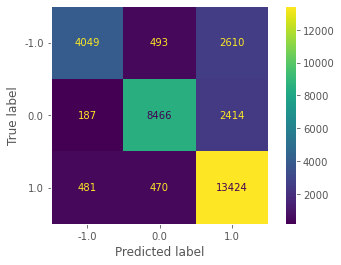

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, pipe_gs.predict(x_test))
plt.grid(False)
plt.show()

In [18]:
print(classification_report(y_test,pipe_gs.predict(x_test)))

              precision    recall  f1-score   support

        -1.0       0.86      0.57      0.68      7152
         0.0       0.90      0.76      0.83     11067
         1.0       0.73      0.93      0.82     14375

    accuracy                           0.80     32594
   macro avg       0.83      0.75      0.78     32594
weighted avg       0.81      0.80      0.79     32594



## Implement KNN models with pipeline as a baseline

In [19]:
pipe_knn = Pipeline([
    ('vect', CountVectorizer(max_features=10000)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
    ])
pipe_knn.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(max_features=10000)),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])

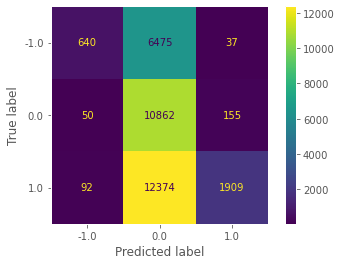

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, pipe_knn.predict(x_test))
plt.grid(False)
plt.show()

In [21]:
print(classification_report(y_test,pipe_knn.predict(x_test)))

              precision    recall  f1-score   support

        -1.0       0.82      0.09      0.16      7152
         0.0       0.37      0.98      0.53     11067
         1.0       0.91      0.13      0.23     14375

    accuracy                           0.41     32594
   macro avg       0.70      0.40      0.31     32594
weighted avg       0.70      0.41      0.32     32594



## Check for overfitting and underfitting & Compare both model accuracy with null accuracy

In [23]:
%%time
train_MNB = pipe_gs.score(x_train, y_train)
test_MNB = pipe_gs.score(x_test, y_test)

Wall time: 4.92 s


In [24]:
%%time
train_knn = pipe_knn.score(x_train, y_train)
test_knn = pipe_knn.score(x_test, y_test)

Wall time: 10min 44s


In [26]:
print('Training set score for Naive Bayes: {:.4f}'.format(train_MNB))
print('Test set score for Naive Bayes: {:.4f}'.format(test_MNB))
print('Training set score for KNN: {:.4f}'.format(train_knn))
print('Test set score for KNN: {:.4f}'.format(test_knn))
null_accuracy= (72249/(72249+55211+35509))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Training set score for Naive Bayes: 0.8005
Test set score for Naive Bayes: 0.7958
Training set score for KNN: 0.4379
Test set score for KNN: 0.4115
Null accuracy score: 0.4433


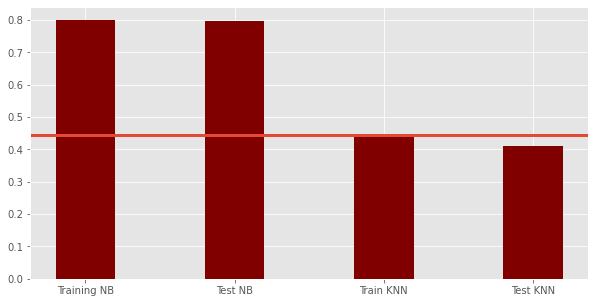

In [27]:
score = {'Training NB' : 0.8005,
        'Test NB' : 0.7958,
        'Train KNN' : 0.4379,
        'Test KNN' : 0.4115}
x_info = list(score.keys())
y_value = list(score.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(x_info, y_value, color ='maroon',
        width = 0.4)

plt.axhline(y=0.4433, linewidth = 3)